### Determine how many components is a good number of components

Here we use results of random forest to make a preliminary selection of feature classes, then we perform PCA on the reduced set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from scipy.stats import uniform

from pickles_to_pandas import pickles_to_pandas

In [3]:
NUM_LABEL_COLS = 13
TEST_SIZE = 0.2
RANDOM_SEED = 0

In [4]:
df = pickles_to_pandas('./data/5s/labeled/features_r02')

In [6]:
df.shape

(5889, 10790)

In [7]:
df_filtered = df[df['excl'] == '0']  # exclude records we want to exclude
df_filtered.shape

(5411, 10790)

In [15]:
# df_filtered.head()

In [16]:
# select features/columns by regex
regx = 'filename|zeros|mfcc_*|spc_*|spr_*|spf_*|sop|alto|tenr|tora|bari|clrt|othr|trmp|trmb|otrb|ext|iowa'
df_filtered = df_filtered.filter(regex=(regx))
# df_filtered.head()


In [11]:
# exclude records we want to exclude
df_filtered = df_filtered[df_filtered['alto'] == '0'] 
df_filtered = df_filtered[df_filtered['sop'] == '0']
df_filtered = df_filtered[df_filtered['bari'] == '0']
df_filtered = df_filtered[df_filtered['clrt'] == '0']
df_filtered = df_filtered[df_filtered['tora'] == '0']
df_filtered = df_filtered[df_filtered['othr'] == '0']
df_filtered = df_filtered[df_filtered['trmp'] == '0']
df_filtered = df_filtered[df_filtered['trmb'] == '0']
df_filtered = df_filtered[df_filtered['otrb'] == '0']

num_x_cols = df_filtered.shape[1] - NUM_LABEL_COLS - 1  
# ^ last bit to adjust for zero indexing
data = df_filtered.iloc[:, 1:num_x_cols].to_numpy() 
# ^ these are the features
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

target = df_filtered[['tenr']].to_numpy().ravel()
# ^ this is the label
target.shape

(3483,)

In [12]:
xs = [n for n in range(4, 60, 2)]
ys = []
for x in xs:
    pca = PCA(n_components=x)
    pca.fit(data)
    d = pca.transform(data)
    x_train, x_test, y_train, y_test = \
         train_test_split(d, target, test_size=TEST_SIZE, random_state=RANDOM_SEED)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ys.append(clf.score(x_test, y_test))
    

Text(0.5, 1.0, 'Principal component analysis: score vs number of components')

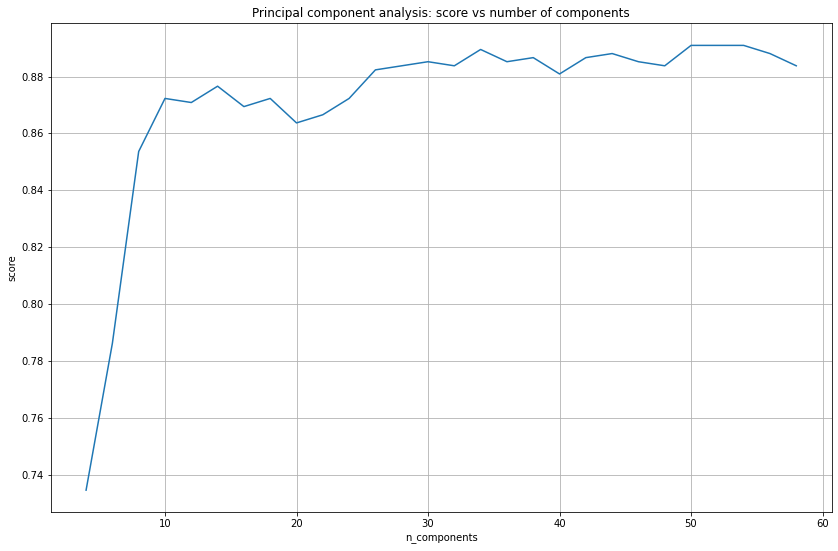

In [18]:
fig = plt.figure(figsize=(14, 9))    
plt.plot(xs, ys)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title("Principal component analysis: score vs number of components")


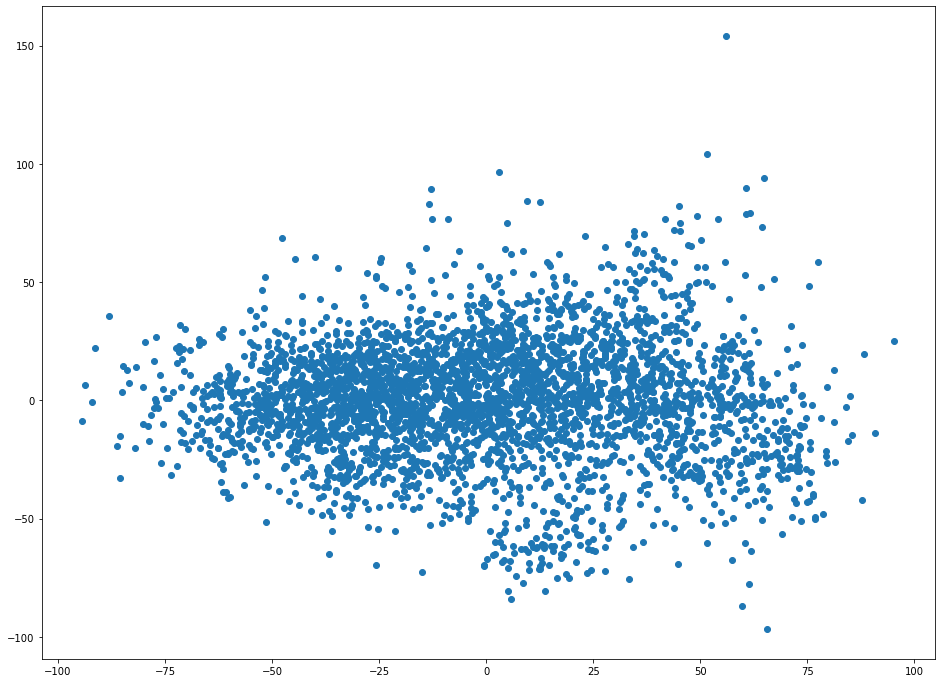

In [14]:
reduced_data = PCA(n_components=2).fit_transform(data)
fig = plt.figure(figsize=(16, 12))
s = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=None)